In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

## Data Loading

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

170500096/170498071 [==============================] - 40s 0us/step
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


## Add class Name

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

## Convert 2D to 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print(y_train[:5])

[6 9 9 4 1]


## Plot train data in image

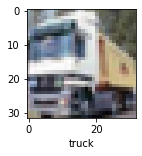

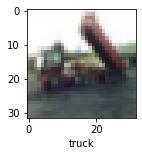

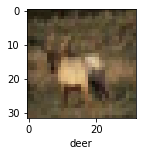

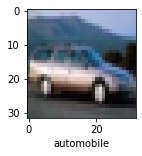

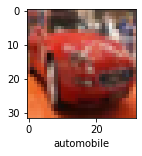

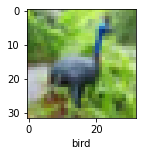

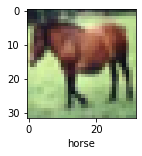

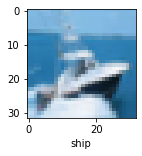

In [9]:
for i in range(1, 9):
    plot_sample(X_train, y_train, i)

## Normalize Image

<i>Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255</i>

In [11]:
print(X_train[0].shape)

(32, 32, 3)


In [12]:
X_train = X_train/ 255.0
X_test = X_test / 255.0

## Build simple artificial neural network for image classification

In [13]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.8165 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6249 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5419 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4828 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4324 - accuracy: 0.4980


## Accuracy Test

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann_model.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification \n ", classification_report(y_test, y_pred_class))

Classification 
                precision    recall  f1-score   support

           0       0.42      0.71      0.53      1000
           1       0.46      0.78      0.58      1000
           2       0.38      0.36      0.37      1000
           3       0.42      0.22      0.29      1000
           4       0.43      0.43      0.43      1000
           5       0.49      0.27      0.35      1000
           6       0.51      0.56      0.53      1000
           7       0.55      0.56      0.55      1000
           8       0.67      0.54      0.60      1000
           9       0.60      0.42      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



## Build model using CNN

In [16]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 38s 25ms/step - loss: 1.4493 - accuracy: 0.4784
Epoch 2/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0991 - accuracy: 0.6148
Epoch 3/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9733 - accuracy: 0.6600
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8897 - accuracy: 0.6920
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8179 - accuracy: 0.7169


In [17]:
cnn_pred = cnn_model.predict(X_test)
cnn_pred_classes = [np.argmax(ele) for ele in cnn_pred]

print("Classification \n ", classification_report(y_test, cnn_pred_classes))

Classification 
                precision    recall  f1-score   support

           0       0.76      0.71      0.74      1000
           1       0.80      0.81      0.81      1000
           2       0.69      0.44      0.54      1000
           3       0.49      0.54      0.52      1000
           4       0.64      0.63      0.63      1000
           5       0.63      0.55      0.59      1000
           6       0.67      0.86      0.75      1000
           7       0.74      0.75      0.74      1000
           8       0.78      0.82      0.80      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

